In [1]:
#Importer les librairies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#chargement du fichier
data=pd.read_csv("EdStatsData.csv")

In [3]:
#afficher les premières lignes du jeu de données
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [69]:
data.shape

(886930, 70)

In [5]:
#énumération des colonnes
print(data.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')


In [6]:
print("Le nombre de cellules in data est:")
print (data.size) #nombre de cellules in "data"

print("Le nombre de NaN in data est:")
print(data.isnull().sum().sum())  #nombre de NaN in "data"

print("Le nombre de non NaN in data est:")
print(data.size - data.isnull().sum().sum())

Le nombre de cellules in data est:
62085100
Le nombre de NaN in data est:
53455179
Le nombre de non NaN in data est:
8629921


In [7]:
# taux de remplissage
print("Le taux de remplissage in data est:")
(data.size - data.isnull().sum().sum())/(data.size)

Le taux de remplissage in data est:


0.13900148344771934

In [73]:
#Données dupliquées
(data.duplicated()).sum().sum()

0

In [8]:
# Filterer les données "data" sur quelques années uniquement (les plus récentes)
data_filtred_years1 = data[['Country Name', 'Country Code','Indicator Name', 'Indicator Code','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2020']] 
print(data_filtred_years1.shape)

(886930, 16)


In [88]:
#Filtrer data sur nos 4 variables retenues et les années: "2007-2008-2009-2010-2011-2012-2013-2014-2015-2016-2017-2020"
Indicator_list = ['IT.NET.USER.P2','SE.SEC.ENRL','SE.TER.ENRL','NY.GNP.PCAP.PP.CD']

DataYearsInticators1 = data_filtred_years1[data_filtred_years1['Indicator Code'].isin(Indicator_list)]
DataYearsInticators1.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
1191,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.849438e+07,2.893511e+07,2.957251e+07,3.013438e+07,3.129979e+07,3.181115e+07,3.125060e+07,30972246.0,NaN,NaN,NaN,NaN
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,7.588664e+06,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9966484.0,NaN,NaN,NaN,NaN
1252,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.313271e+04,1.382449e+04,1.385250e+04,1.428402e+04,1.499616e+04,1.584650e+04,1.614156e+04,NaN,NaN,NaN,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN,NaN,NaN
4856,East Asia & Pacific,EAS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1.636890e+08,1.630931e+08,1.633842e+08,1.626082e+08,1.616448e+08,1.597344e+08,1.596127e+08,154212112.0,NaN,NaN,NaN,NaN


In [10]:
#On note que les années '2017' et '2020' ne contiennent que des NaN, on ne garde que les colonnes de 2007 à 2016
data_filtred_years = data[['Country Name', 'Country Code','Indicator Name', 'Indicator Code','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']] 
DataYearsInticators = data_filtred_years[data_filtred_years['Indicator Code'].isin(Indicator_list)]
DataYearsInticators.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1191,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.849438e+07,2.893511e+07,2.957251e+07,3.013438e+07,3.129979e+07,3.181115e+07,3.125060e+07,30972246.0,NaN,NaN
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,7.588664e+06,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9966484.0,NaN,NaN
1252,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.313271e+04,1.382449e+04,1.385250e+04,1.428402e+04,1.499616e+04,1.584650e+04,1.614156e+04,NaN,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN
4856,East Asia & Pacific,EAS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1.636890e+08,1.630931e+08,1.633842e+08,1.626082e+08,1.616448e+08,1.597344e+08,1.596127e+08,154212112.0,NaN,NaN


In [11]:
print(DataYearsInticators.shape)

(968, 14)


In [12]:
#Fonction pour extraire la derniere valeur non NaN pour chaque ligne
def Recente (row): 
   for year in range(2016,2007,-1):
      if not np.isnan(row[str(year)]) :
         return row[str(year)]
   return "NAN"

In [13]:
DataYearsInticators2=DataYearsInticators.copy()
DataYearsInticators2['Recente'] = DataYearsInticators2.apply (lambda row: Recente (row),axis=1)
DataYearsInticators2

,Country Name,Country Code,Indicator Name,Indicator Code,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Recente
1191,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.849438e+07,2.893511e+07,2.957251e+07,3.013438e+07,3.129979e+07,3.181115e+07,3.125060e+07,3.097225e+07,NaN,NaN,3.09722e+07
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,7.588664e+06,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN,NaN,9.96648e+06
1252,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.313271e+04,1.382449e+04,1.385250e+04,1.428402e+04,1.499616e+04,1.584650e+04,1.614156e+04,NaN,NaN,NaN,16141.6
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN,36.8686
4856,East Asia & Pacific,EAS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1.636890e+08,1.630931e+08,1.633842e+08,1.626082e+08,1.616448e+08,1.597344e+08,1.596127e+08,1.542121e+08,NaN,NaN,1.54212e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880975,Zambia,ZMB,Internet users (per 100 people),IT.NET.USER.P2,4.870000e+00,5.550000e+00,6.310000e+00,1.000000e+01,1.150000e+01,1.346820e+01,1.540000e+01,1.900000e+01,21.000000,25.506579,25.5066
884456,Zimbabwe,ZWE,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,NaN,NaN,NaN,NaN,NaN,9.367340e+05,9.574610e+05,NaN,NaN,NaN,957461
884469,Zimbabwe,ZWE,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,9.461100e+04,9.328500e+04,9.401200e+04,9.411500e+04,NaN,135575.000000,NaN,135575
884517,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.320000e+03,1.050000e+03,1.100000e+03,1.240000e+03,1.390000e+03,1.610000e+03,1.750000e+03,1.790000e+03,1790.000000,1810.000000,1810


In [14]:
DataYearsInticators2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968 entries, 1191 to 884640
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    968 non-null    object 
 1   Country Code    968 non-null    object 
 2   Indicator Name  968 non-null    object 
 3   Indicator Code  968 non-null    object 
 4   2007            777 non-null    float64
 5   2008            779 non-null    float64
 6   2009            780 non-null    float64
 7   2010            781 non-null    float64
 8   2011            790 non-null    float64
 9   2012            779 non-null    float64
 10  2013            759 non-null    float64
 11  2014            743 non-null    float64
 12  2015            671 non-null    float64
 13  2016            437 non-null    float64
 14  Recente         968 non-null    object 
dtypes: float64(10), object(5)
memory usage: 121.0+ KB


In [15]:
#Convertir la colonne Récente en float:
DataYearsInticators2['Recente'] = pd.to_numeric(DataYearsInticators2['Recente'],errors = 'coerce')
DataYearsInticators2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 968 entries, 1191 to 884640
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    968 non-null    object 
 1   Country Code    968 non-null    object 
 2   Indicator Name  968 non-null    object 
 3   Indicator Code  968 non-null    object 
 4   2007            777 non-null    float64
 5   2008            779 non-null    float64
 6   2009            780 non-null    float64
 7   2010            781 non-null    float64
 8   2011            790 non-null    float64
 9   2012            779 non-null    float64
 10  2013            759 non-null    float64
 11  2014            743 non-null    float64
 12  2015            671 non-null    float64
 13  2016            437 non-null    float64
 14  Recente         858 non-null    float64
dtypes: float64(11), object(4)
memory usage: 121.0+ KB


In [16]:
DataYearsInticators3 = DataYearsInticators2[['Country Name','Indicator Name','Recente']]
DataYearsInticators3

,Country Name,Indicator Name,Recente
1191,Arab World,"Enrolment in secondary education, both sexes (...",3.097225e+07
1204,Arab World,"Enrolment in tertiary education, all programme...",9.966484e+06
1252,Arab World,"GNI per capita, PPP (current international $)",1.614156e+04
1375,Arab World,Internet users (per 100 people),3.686860e+01
4856,East Asia & Pacific,"Enrolment in secondary education, both sexes (...",1.542121e+08
...,...,...,...
880975,Zambia,Internet users (per 100 people),2.550658e+01
884456,Zimbabwe,"Enrolment in secondary education, both sexes (...",9.574610e+05
884469,Zimbabwe,"Enrolment in tertiary education, all programme...",1.355750e+05
884517,Zimbabwe,"GNI per capita, PPP (current international $)",1.810000e+03


In [17]:
#Pour rendre notre tableau plus lisible:
Tableau= DataYearsInticators3.pivot_table('Recente', index='Country Name', columns = 'Indicator Name')
Tableau

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people)
Country Name,,,,
Afghanistan,2698816.0,262874.0,1900.000000,10.595726
Albania,315079.0,160527.0,11670.000000,66.363445
Algeria,4572513.0,1289474.0,14420.000000,42.945527
Andorra,4395.0,501.0,NaN,97.930637
Angola,884982.0,221037.0,6100.000000,13.000000
...,...,...,...,...
West Bank and Gaza,721414.0,221018.0,NaN,61.178385
World,579206656.0,212670016.0,16161.195984,45.910282
"Yemen, Rep.",1768102.0,267498.0,2500.000000,24.579208


In [18]:
#Nombre de NaN
Tableau.isna().sum().sum()

90

In [19]:
#Spprimer les lignes(pays) contenant au moins une valeur NaN
TableauPaysIndicateurs=Tableau.dropna()
TableauPaysIndicateurs

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people)
Country Name,,,,
Afghanistan,2698816.0,262874.0,1900.000000,10.595726
Albania,315079.0,160527.0,11670.000000,66.363445
Algeria,4572513.0,1289474.0,14420.000000,42.945527
Angola,884982.0,221037.0,6100.000000,13.000000
Antigua and Barbuda,8048.0,1792.0,22130.000000,73.000000
...,...,...,...,...
Uzbekistan,3908744.0,265679.0,6650.000000,46.791287
"Venezuela, RB",2522661.0,2123041.0,17440.000000,60.000000
World,579206656.0,212670016.0,16161.195984,45.910282


In [20]:
#Nombre de NaN
TableauPaysIndicateurs.isna().sum().sum()

0

In [21]:
print("Description statistique des données associées aux indicateurs choisis")
TableauPaysIndicateurs.describe(include="all")

Description statistique des données associées aux indicateurs choisis


Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people)
count,1.800000e+02,1.800000e+02,180.000000,180.000000
mean,2.136027e+07,7.676320e+06,20559.959825,51.394316
std,7.244450e+07,2.574482e+07,21130.578194,27.456703
min,4.040000e+03,9.730000e+02,700.000000,1.177119
25%,2.809885e+05,8.490650e+04,5137.500000,25.668692
50%,9.514725e+05,2.745136e+05,14010.000000,54.000000
75%,5.076752e+06,2.082026e+06,28837.500000,75.598968
max,5.792067e+08,2.126700e+08,125000.000000,98.240016


In [22]:
TableauSortedInternet=TableauPaysIndicateurs.sort_values(by = 'Internet users (per 100 people)', ascending = False)
InternetSorted=TableauSortedInternet[['Internet users (per 100 people)']]
InternetSorted

Indicator Name,Internet users (per 100 people)
Country Name,
Iceland,98.240016
Bermuda,98.000000
Bahrain,97.999981
Luxembourg,97.493930
Norway,97.298204
...,...
Chad,5.000000
Madagascar,4.713663
Niger,4.322758


Text(0.5, 1.0, "Répartition des utilisateurs d'internet")

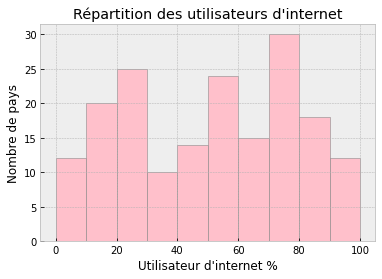

In [81]:
plt.hist(InternetSorted, range = (0, 100), bins = 10, color = 'pink',
            edgecolor = 'grey')
plt.xlabel("Utilisateur d'internet %")
plt.ylabel('Nombre de pays')
plt.title("Répartition des utilisateurs d'internet")

In [24]:
TableauSortedGNI=TableauPaysIndicateurs.sort_values(by = 'GNI per capita, PPP (current international $)', ascending = False)
GNISorted=TableauSortedGNI[['GNI per capita, PPP (current international $)']]
GNISorted

Indicator Name,"GNI per capita, PPP (current international $)"
Country Name,
Qatar,125000.0
"Macao SAR, China",98650.0
Singapore,85190.0
Kuwait,83310.0
Brunei Darussalam,83170.0
...,...
Niger,970.0
"Congo, Dem. Rep.",790.0
Burundi,770.0


Text(0.5, 1.0, 'Distribution du GNI per capita, PPP (current international $)')

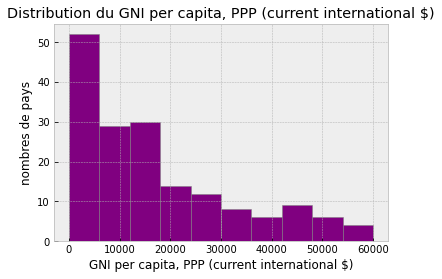

In [80]:
plt.hist(GNISorted, range = (0, 60000), bins = 10, color = 'purple',
            edgecolor = 'grey')
plt.xlabel('GNI per capita, PPP (current international $)')
plt.ylabel('nombres de pays')
plt.title('Distribution du GNI per capita, PPP (current international $)')

In [26]:
TableauSortedSecondary=TableauPaysIndicateurs.sort_values(by = 'Enrolment in secondary education, both sexes (number)', ascending = False)
SecondarySorted=TableauSortedSecondary[["Enrolment in secondary education, both sexes (number)"]]
SecondarySorted2= SecondarySorted.iloc[[2,10,22],:]
SecondarySorted2

Indicator Name,"Enrolment in secondary education, both sexes (number)"
Country Name,
Middle income,453920000.0
High income,90009712.0
Low income,35273568.0


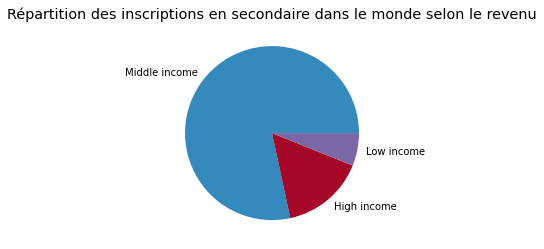

In [79]:
y1 = SecondarySorted2["Enrolment in secondary education, both sexes (number)"]
mylabels1 = SecondarySorted2.index

plt.pie(y1, labels = mylabels1)
plt.title("Répartition des inscriptions en secondaire dans le monde selon le revenu")
plt.show()

In [28]:
TableauSortedTertiary=TableauPaysIndicateurs.sort_values(by = 'Enrolment in tertiary education, all programmes, both sexes (number)', ascending = False)
TertiarySorted=TableauSortedTertiary[["Enrolment in tertiary education, all programmes, both sexes (number)"]]
TertiarySorted2= TertiarySorted.iloc[[1,8,32],:]
TertiarySorted2

Indicator Name,"Enrolment in tertiary education, all programmes, both sexes (number)"
Country Name,
Middle income,154710016.0
High income,53512108.0
Low income,4447326.0


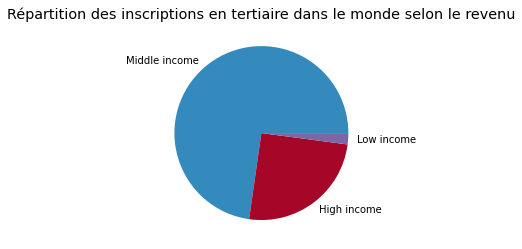

In [78]:
y2 = TertiarySorted2["Enrolment in tertiary education, all programmes, both sexes (number)"]
mylabels2 = TertiarySorted2.index

plt.pie(y2, labels = mylabels2)
plt.title("Répartition des inscriptions en tertiaire dans le monde selon le revenu")
plt.show()

In [30]:
#Appliquer des seuils sur les indicateurs pour n'extraire que les pays avec un fort potentiel de clients
TPaysIndicateursFiltres=TableauPaysIndicateurs.copy()
TPaysIndicateursFiltres.drop(TPaysIndicateursFiltres[(TPaysIndicateursFiltres['Enrolment in tertiary education, all programmes, both sexes (number)'] < 18000)| (TPaysIndicateursFiltres['Enrolment in secondary education, both sexes (number)'] < 30000)  | (TPaysIndicateursFiltres['GNI per capita, PPP (current international $)'] < 30000) | (TPaysIndicateursFiltres['Internet users (per 100 people)'] < 65)].index, inplace=True)
TPaysIndicateursFiltres.shape

(38, 4)

In [31]:
#Supprimer les lignes contenant des régions
TPaysIndicateursFiltres2=TPaysIndicateursFiltres.copy()
TPaysIndicateursFiltres2.drop(['OECD members', 'High income', 'Europe & Central Asia','North America','European Union','Euro area'],0,inplace=True)
TPaysIndicateursFiltres2.shape

(32, 4)

In [32]:
#Normaliser les colonnes afin de pouvoir calculer un score d'attractivité pour chaque pays

from sklearn import preprocessing

cols = TPaysIndicateursFiltres2.columns
ind= TPaysIndicateursFiltres2.index

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(TPaysIndicateursFiltres2)
TPaysIndicateursFiltres_normalized = pd.DataFrame(np_scaled, columns = cols, index=ind)
TPaysIndicateursFiltres_normalized.head()

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people)
Country Name,,,,
Australia,0.096745,0.073513,0.168105,0.648147
Austria,0.027314,0.020852,0.217053,0.510403
Bahrain,0.002577,0.001015,0.150000,0.991555
Belgium,0.049084,0.024889,0.168526,0.587560
Cyprus,0.001119,0.000926,0.014947,0.214079


In [33]:
#Calculer le score d'attractivité pour chaque pays
TPaysIndicateursFiltres_normalized["Score d'attractivité"] = TPaysIndicateursFiltres_normalized.apply(lambda row: (row['GNI per capita, PPP (current international $)']+row['Internet users (per 100 people)']+row['Enrolment in tertiary education, all programmes, both sexes (number)']+row['Enrolment in secondary education, both sexes (number)']), axis=1)
TPaysIndicateursFiltres_normalized.head()

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),Score d'attractivité
Country Name,,,,,
Australia,0.096745,0.073513,0.168105,0.648147,0.986510
Austria,0.027314,0.020852,0.217053,0.510403,0.775622
Bahrain,0.002577,0.001015,0.150000,0.991555,1.145147
Belgium,0.049084,0.024889,0.168526,0.587560,0.830060
Cyprus,0.001119,0.000926,0.014947,0.214079,0.231071


In [34]:
#Classer les pays par score d'attractivité
TableauSortedByScore=TPaysIndicateursFiltres_normalized.sort_values(by = "Score d'attractivité", ascending = False)
TableauSortedByScore.head()

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),Score d'attractivité
Country Name,,,,,
United States,1.000000,1.000000,0.302105,0.223802,2.525907
Qatar,0.002706,0.000449,1.000000,0.861076,1.864231
Japan,0.297417,0.196968,0.134632,0.780473,1.409489
United Kingdom,0.269710,0.119606,0.127368,0.878127,1.394812
Germany,0.292684,0.151629,0.207474,0.697697,1.349483


Text(0, 0.5, 'Pays')

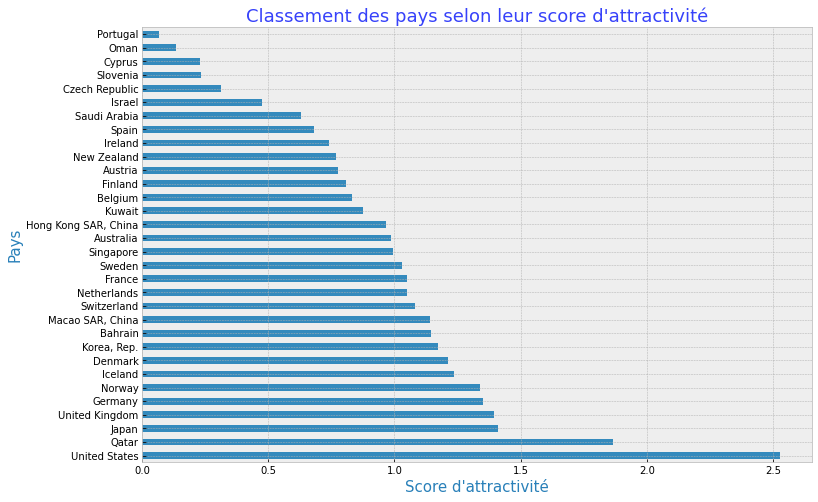

In [77]:
TableauSortedByScore["Score d'attractivité"].plot.barh(figsize=(12,8), fontsize=10, rot=0)

plt.title("Classement des pays selon leur score d'attractivité", fontsize=18, color='#3742fa')
plt.xlabel("Score d'attractivité", fontsize=15, color='#2980b9')
plt.ylabel('Pays', fontsize=15, color='#2980b9')

In [36]:
#Selectionner le top 1O des pays
Top10= TableauSortedByScore.iloc[0:10,:-1]
Top10.columns
Top10.index

Index(['United States', 'Qatar', 'Japan', 'United Kingdom', 'Germany',
       'Norway', 'Iceland', 'Denmark', 'Korea, Rep.', 'Bahrain'],
      dtype='object', name='Country Name')

Text(0, 0.5, 'Pays')

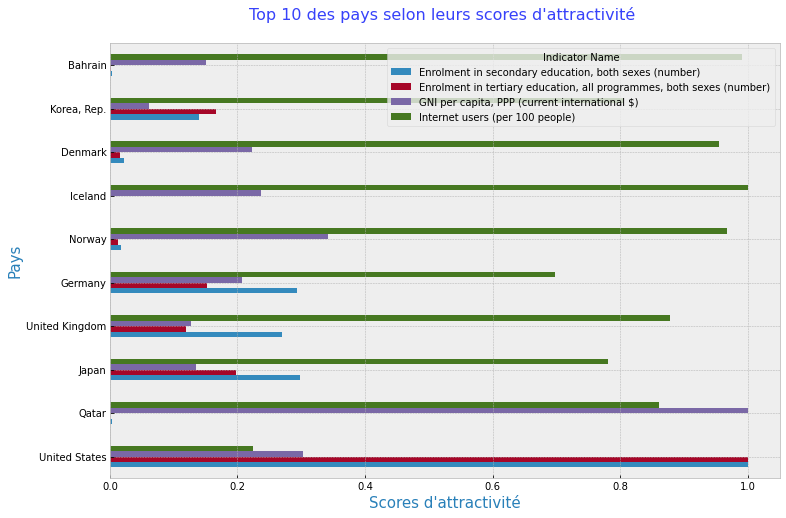

In [76]:
ax = Top10.plot.barh(figsize=(12,8), fontsize=10, rot=0)
plt.title("Top 10 des pays selon leurs scores d'attractivité \n", fontsize=16, color='#3742fa')
plt.xlabel("Scores d'attractivité", fontsize=15, color='#2980b9')
plt.ylabel('Pays', fontsize=15, color='#2980b9')

In [38]:
#Estimer l'évolution du potentiel de clients pour les pays retenus
TPaysIndicateursFiltres2.index

Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Hong Kong SAR, China', 'Iceland', 'Ireland', 'Israel', 'Japan',
       'Korea, Rep.', 'Kuwait', 'Macao SAR, China', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Singapore', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States'],
      dtype='object', name='Country Name')

In [39]:
IndexPays=['Australia', 'Austria', 'Bahrain', 'Belgium', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Hong Kong SAR, China', 'Iceland', 'Ireland', 'Israel', 'Japan', 'Korea, Rep.', 'Kuwait', 'Macao SAR, China', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']

In [40]:
Tableau_evolution=(DataYearsInticators2.loc[DataYearsInticators2['Country Name'].isin(IndexPays)])

In [41]:
#Filtrer le tableau sur quelques colonnes
Tableau_evolution2 = Tableau_evolution[['Country Name','Indicator Name','2007','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',]]
Tableau_evolution2.head()

,Country Name,Indicator Name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
129466,Australia,"Enrolment in secondary education, both sexes (...",2189319.00,2222159.00,2255457.00,2282421.0,2.328350e+06,2377328.0,2.384025e+06,2.371284e+06,NaN,NaN
129479,Australia,"Enrolment in tertiary education, all programme...",1083715.00,1117804.00,1199845.00,1276488.0,1.324257e+06,1364203.0,1.390478e+06,1.453521e+06,NaN,NaN
129527,Australia,"GNI per capita, PPP (current international $)",34960.00,35980.00,38880.00,37670.0,4.010000e+04,41320.0,4.453000e+04,4.522000e+04,45510.000000,45970.000000
129650,Australia,Internet users (per 100 people),69.45,71.67,74.25,76.0,7.948770e+01,79.0,8.345350e+01,8.400000e+01,84.560519,88.238658
133131,Austria,"Enrolment in secondary education, both sexes (...",777792.00,770792.00,762981.00,743709.0,7.235230e+05,709910.0,7.065016e+05,6.973884e+05,691071.250000,NaN


In [42]:
#préparation des tableaux pour l'étude de l'évolution temporelle de l'indicateur "Internet users (per 100 people)"
Tableau_evolutionI=(Tableau_evolution2[Tableau_evolution2['Indicator Name'].isin(['Internet users (per 100 people)'])])
evolutionInternet=Tableau_evolutionI[['Country Name','2007','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']]

evolutionInternet2=evolutionInternet.set_index("Country Name")
evolutionInternet2


,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,
Australia,69.450000,71.67,74.25,76.0000,79.487698,79.000000,83.453497,84.000000,84.560519,88.238658
Austria,69.370000,72.87,73.45,75.1700,78.739993,80.029994,80.618800,80.995825,83.940142,84.323331
Bahrain,32.910000,51.95,53.00,55.0000,76.999966,88.000000,90.000040,90.503133,93.478301,97.999981
Belgium,64.440000,66.00,70.00,75.0000,81.609996,80.719991,82.170200,85.000000,85.052900,86.516500
Cyprus,40.770000,42.31,49.81,52.9900,56.859892,60.689868,65.454800,69.330000,71.715900,75.900360
Czech Republic,51.930000,62.97,64.43,68.8200,70.490000,73.430008,74.110400,74.231712,75.668839,76.481201
Denmark,85.030000,85.02,86.84,88.7200,89.810013,92.260012,94.629700,95.990000,96.330500,96.967785
Finland,80.780000,83.67,82.49,86.8900,88.709995,89.879998,91.514400,86.530393,86.422133,87.703650
France,66.090000,70.68,71.58,77.2800,77.819999,81.440000,81.919800,83.750000,84.694500,85.622200


In [43]:
#'United States', 'Qatar', 'Japan', 'United Kingdom', 'Germany','Norway', 'Iceland', 'Denmark', 'Korea, Rep.', 'Bahrain'

In [44]:
#Evolution temporelle de l'indicateur "Internet users (per 100 people)"
evolutionInternet3=pd.DataFrame({'x': ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'], 'United States': evolutionInternet2.iloc[-1,:], 'Qatar': evolutionInternet2.iloc[-9,:], 'Japan': evolutionInternet2.iloc[14,:], 'United Kingdom': evolutionInternet2.iloc[-2,:],'Germany': evolutionInternet2.iloc[9,:], 'Norway': evolutionInternet2.iloc[20,:], 'Iceland': evolutionInternet2.iloc[11,:], 'Denmark': evolutionInternet2.iloc[6,:],'Korea, Rep.': evolutionInternet2.iloc[15,:], 'Bahrain': evolutionInternet2.iloc[2,:] })
evolutionInternet3

,x,United States,Qatar,Japan,United Kingdom,Germany,Norway,Iceland,Denmark,"Korea, Rep.",Bahrain
2007,2007,75.000000,37.000000,74.300000,75.090000,75.160000,86.930000,90.600000,85.030000,78.800000,32.910000
2008,2008,74.000000,44.300000,75.400000,78.390000,78.000000,90.570000,91.000000,85.020000,81.000000,51.950000
2009,2009,71.000000,53.100000,78.000000,83.560000,79.000000,92.080000,93.000000,86.840000,81.600000,53.000000
2010,2010,71.690000,69.000000,78.210000,85.000000,82.000000,93.390000,93.390000,88.720000,83.700000,55.000000
2011,2011,69.729461,69.000000,79.054114,85.379999,81.270000,93.489983,94.819687,89.810013,83.759120,76.999966
2012,2012,74.700000,69.300000,79.496400,87.479998,82.349998,94.649978,96.209800,92.260012,84.070000,88.000000
2013,2013,71.400000,85.300000,88.219429,89.844100,84.170000,95.053400,96.546800,94.629700,84.770000,90.000040
2014,2014,73.000000,91.490000,89.106833,91.610000,86.190000,96.300000,98.160000,95.990000,87.556826,90.503133
2015,2015,74.554202,92.884826,91.058028,92.000300,87.589800,96.810300,98.200000,96.330500,89.648631,93.478301
2016,2016,76.176737,94.291118,92.000000,94.775801,89.647101,97.298204,98.240016,96.967785,92.716545,97.999981


In [45]:
#Description statistique de l'indicateurs "Internet users" sur les 10 années retenues pour chacun des top 10 pays
(evolutionInternet3[['United States', 'Qatar', 'Japan', 'United Kingdom', 'Germany','Norway', 'Iceland', 'Denmark', 'Korea, Rep.', 'Bahrain']]).describe(include="all")

,United States,Qatar,Japan,United Kingdom,Germany,Norway,Iceland,Denmark,"Korea, Rep.",Bahrain
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,73.125040,70.566594,82.484480,86.313020,82.537690,93.657186,95.016630,91.159801,84.762112,72.984142
std,2.087353,20.666837,6.807262,6.189204,4.491212,3.170897,2.916645,4.699375,4.180296,22.742590
min,69.729461,37.000000,74.300000,75.090000,75.160000,86.930000,90.600000,85.020000,78.800000,32.910000
25%,71.472500,57.075000,78.052500,83.920000,79.567500,92.407500,93.097500,87.310000,82.125000,53.500000
50%,73.500000,69.150000,79.275257,86.429998,82.174999,94.069980,95.514743,91.035013,83.914560,82.499983
75%,74.663551,89.942500,88.884982,91.168525,85.685000,95.988350,97.756700,95.649925,86.860120,90.377360
max,76.176737,94.291118,92.000000,94.775801,89.647101,97.298204,98.240016,96.967785,92.716545,97.999981


In [46]:
MyY = evolutionInternet3.iloc[1,1:]
MyY

United States        74
Qatar              44.3
Japan              75.4
United Kingdom    78.39
Germany              78
Norway            90.57
Iceland              91
Denmark           85.02
Korea, Rep.          81
Bahrain           51.95
Name: 2008, dtype: object

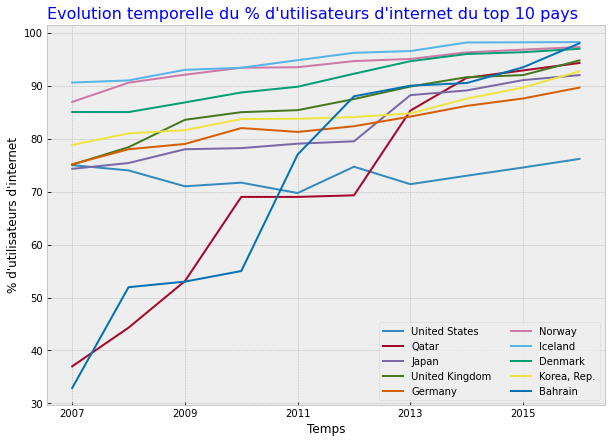

In [85]:
plt.style.use('bmh')

evolutionInternet3.plot(x = 'x', y = MyY.index, figsize = (10,7))
plt.title("Evolution temporelle du % d'utilisateurs d'internet du top 10 pays", loc='left', fontsize=16, fontweight=0, color='blue')

plt.legend(loc=4, ncol=2)
plt.xlabel("Temps")
plt.ylabel("% d'utilisateurs d'internet")
plt.show()

In [48]:
#préparation des tableaux pour l'étude de l'évolution temporelle de l'indicateur 'GNI per capita, PPP (current international $)'

Tableau_evolutionG=(Tableau_evolution2[Tableau_evolution2['Indicator Name'].isin(['GNI per capita, PPP (current international $)'])])
evolutionGNI=Tableau_evolutionG[['Country Name','2007','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']]

evolutionGNI2=evolutionGNI.set_index("Country Name")
evolutionGNI2.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,
Australia,34960.0,35980.0,38880.0,37670.0,40100.0,41320.0,44530.0,45220.0,45510.0,45970.0
Austria,39340.0,41660.0,40950.0,42440.0,44600.0,46500.0,48050.0,49070.0,49720.0,50620.0
Bahrain,39730.0,39100.0,35290.0,36080.0,35440.0,36510.0,38840.0,38340.0,44250.0,NaN
Belgium,37340.0,39030.0,38090.0,41390.0,41660.0,43390.0,44170.0,45030.0,45640.0,46010.0
Cyprus,32460.0,34110.0,33480.0,32290.0,33190.0,30900.0,29180.0,29370.0,31430.0,31420.0


In [49]:
#Evolution temporelle de l'indicateur "GNI per capita, PPP (current international $)"
evolutionGNI3=pd.DataFrame({'x': ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'], 'United States': evolutionGNI2.iloc[-1,:], 'Qatar': evolutionGNI2.iloc[-9,:], 'Japan': evolutionGNI2.iloc[14,:], 'United Kingdom': evolutionGNI2.iloc[-2,:],'Germany': evolutionGNI2.iloc[9,:], 'Norway': evolutionGNI2.iloc[20,:], 'Iceland': evolutionGNI2.iloc[11,:], 'Denmark': evolutionGNI2.iloc[6,:],'Korea, Rep.': evolutionGNI2.iloc[15,:], 'Bahrain': evolutionGNI2.iloc[2,:] })
evolutionGNI3

,x,United States,Qatar,Japan,United Kingdom,Germany,Norway,Iceland,Denmark,"Korea, Rep.",Bahrain
2007,2007,48420.0,106010.0,35570.0,35530.0,36970.0,55670.0,38740.0,39150.0,27740.0,39730.0
2008,2008,48640.0,108270.0,35710.0,36190.0,38400.0,61400.0,34050.0,41740.0,28650.0,39100.0
2009,2009,47250.0,102410.0,33910.0,34520.0,37910.0,55770.0,33630.0,40780.0,28250.0,35290.0
2010,2010,48880.0,109930.0,35900.0,36200.0,40040.0,58620.0,32230.0,43790.0,30410.0,36080.0
2011,2011,50710.0,119120.0,36790.0,36900.0,43770.0,62640.0,34550.0,45340.0,31410.0,35440.0
2012,2012,52850.0,119330.0,38190.0,37430.0,44590.0,65920.0,36690.0,45820.0,32430.0,36510.0
2013,2013,54000.0,120290.0,40280.0,38780.0,46250.0,67670.0,42100.0,48210.0,32850.0,38840.0
2014,2014,56160.0,121570.0,40810.0,40180.0,48130.0,68070.0,43560.0,49540.0,33740.0,38340.0
2015,2015,57900.0,125000.0,42230.0,41190.0,49060.0,65180.0,47290.0,50620.0,34520.0,44250.0
2016,2016,58700.0,NaN,42790.0,42100.0,49710.0,62550.0,52490.0,51100.0,35790.0,NaN


In [50]:
#Description statistique de l'indicateurs "GNI per capita" sur les 10 années retenues pour chacun des top 10 pays
(evolutionGNI3[['United States', 'Qatar', 'Japan', 'United Kingdom', 'Germany','Norway', 'Iceland', 'Denmark', 'Korea, Rep.', 'Bahrain']]).describe(include="all")

,United States,Qatar,Japan,United Kingdom,Germany,Norway,Iceland,Denmark,"Korea, Rep.",Bahrain
count,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
mean,52351.000000,114658.888889,38218.000000,37902.000000,43483.000000,62349.000000,39533.000000,45609.000000,31579.000000,38175.555556
std,4197.394562,8032.364914,3113.475371,2549.796506,4848.892313,4529.322858,6688.675421,4228.368348,2772.601867,2819.871944
min,47250.000000,102410.000000,33910.000000,34520.000000,36970.000000,55670.000000,32230.000000,39150.000000,27740.000000,35290.000000
25%,48700.000000,108270.000000,35757.500000,36192.500000,38810.000000,59315.000000,34175.000000,42252.500000,29090.000000,36080.000000
50%,51780.000000,119120.000000,37490.000000,37165.000000,44180.000000,62595.000000,37715.000000,45580.000000,31920.000000,38340.000000
75%,55620.000000,120290.000000,40677.500000,39830.000000,47660.000000,65735.000000,43195.000000,49207.500000,33517.500000,39100.000000
max,58700.000000,125000.000000,42790.000000,42100.000000,49710.000000,68070.000000,52490.000000,51100.000000,35790.000000,44250.000000


Text(0, 0.5, 'GNI per capita')

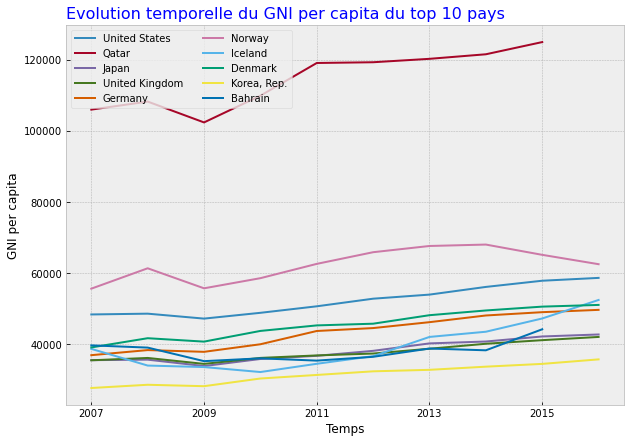

In [84]:
plt.style.use('bmh')

evolutionGNI3.plot(x = 'x', y = MyY.index, figsize = (10,7))

plt.legend(loc=2, ncol=2)
plt.title("Evolution temporelle du GNI per capita du top 10 pays", loc='left', fontsize=16, fontweight=0, color='blue')
plt.xlabel("Temps")
plt.ylabel("GNI per capita")

In [52]:
#préparation des tableaux pour l'étude de l'évolution temporelle de l'indicateur 'Enrolment in tertiary education, all programmes, both sexes (number)'

Tableau_evolutionT=(Tableau_evolution2[Tableau_evolution2['Indicator Name'].isin(['Enrolment in tertiary education, all programmes, both sexes (number)'])])
evolutionTertiary=Tableau_evolutionT[['Country Name','2007','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']]

evolutionTertiary2=evolutionTertiary.set_index("Country Name")
evolutionTertiary2

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,
Australia,1083715.0,1117804.0,1199845.0,1276488.0,1324257.0,1364203.0,1.390478e+06,1.453521e+06,NaN,NaN
Austria,260975.0,284791.0,308150.0,350187.0,361797.0,376498.0,4.227782e+05,4.212248e+05,4.259717e+05,NaN
Bahrain,NaN,NaN,NaN,NaN,40175.0,40498.0,3.709400e+04,3.811300e+04,3.890100e+04,NaN
Belgium,393687.0,401652.0,425219.0,445309.0,462419.0,477712.0,4.884880e+05,4.959100e+05,5.047450e+05,NaN
Cyprus,22227.0,25688.0,30986.0,32233.0,32118.0,31772.0,3.196500e+04,3.367400e+04,3.716600e+04,NaN
Czech Republic,363277.0,392540.0,416847.0,437354.0,446158.0,440230.0,4.274410e+05,4.186240e+05,3.955290e+05,NaN
Denmark,232194.0,230707.0,234574.0,240536.0,258932.0,275009.0,2.911470e+05,3.013990e+05,3.137560e+05,NaN
Finland,309163.0,309648.0,296691.0,303554.0,308336.0,308924.0,3.090090e+05,3.060800e+05,3.024780e+05,NaN
France,2179505.0,2164538.0,2172855.0,2245097.0,2259448.0,2296306.0,2.338135e+06,2.388880e+06,NaN,NaN


In [53]:
#Evolution temporelle de l'indicateur "Enrolment in tertiary education, all programmes, both sexes (number)"
evolutionTertiary3=pd.DataFrame({'x': ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'], 'United States': evolutionTertiary2.iloc[-1,:], 'Qatar': evolutionTertiary2.iloc[-9,:], 'Japan': evolutionTertiary2.iloc[14,:], 'United Kingdom': evolutionTertiary2.iloc[-2,:],'Germany': evolutionTertiary2.iloc[9,:], 'Norway': evolutionTertiary2.iloc[20,:], 'Iceland': evolutionTertiary2.iloc[11,:], 'Denmark': evolutionTertiary2.iloc[6,:],'Korea, Rep.': evolutionTertiary2.iloc[15,:], 'Bahrain': evolutionTertiary2.iloc[2,:] })
evolutionTertiary3

,x,United States,Qatar,Japan,United Kingdom,Germany,Norway,Iceland,Denmark,"Korea, Rep.",Bahrain
2007,2007,17758870.0,11132.0,4032625.0,2362815.00,NaN,215237.0,15821.0,232194.0,3208591.0,NaN
2008,2008,18248124.0,12545.0,3938632.0,2329494.00,NaN,212672.0,16631.0,230707.0,3204310.0,NaN
2009,2009,19102814.0,13133.0,3874224.0,2415222.00,NaN,219282.0,16919.0,234574.0,3219216.0,NaN
2010,2010,20427708.0,13846.0,3836314.0,2479197.00,NaN,224706.0,18051.0,240536.0,3269509.0,NaN
2011,2011,21016126.0,15352.0,3880544.0,2492284.00,NaN,229743.0,18845.0,258932.0,3356011.0,40175.0
2012,2012,20994112.0,17266.0,3884638.0,2495779.00,NaN,238224.0,19099.0,275009.0,3359739.0,40498.0
2013,2013,19972624.0,20902.0,3862749.0,2386199.00,2780012.75,255416.0,19097.0,291147.0,3342264.0,37094.0
2014,2014,19700220.0,25255.0,3862460.0,2352932.75,2912203.50,264207.0,NaN,301399.0,3318307.0,38113.0
2015,2015,19531728.0,27866.0,NaN,NaN,2977781.00,268231.0,NaN,313756.0,3268099.0,38901.0
2016,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#Description statistique de l'indicateurs "Enrolment in tertiary education" sur les 10 années retenues pour chacun des top 10 pays
(evolutionTertiary3[['United States', 'Qatar', 'Japan', 'United Kingdom', 'Germany','Norway', 'Iceland', 'Denmark', 'Korea, Rep.', 'Bahrain']]).describe(include="all")

,United States,Qatar,Japan,United Kingdom,Germany,Norway,Iceland,Denmark,"Korea, Rep.",Bahrain
count,9.000000e+00,9.000000,8.000000e+00,8.000000e+00,3.000000e+00,9.000000,7.000000,9.000000,9.000000e+00,5.000000
mean,1.963915e+07,17477.444444,3.896523e+06,2.414240e+06,2.889999e+06,236413.111111,17780.428571,264250.444444,3.282894e+06,38956.200000
std,1.131279e+06,5930.403867,6.224014e+04,6.690200e+04,1.007365e+05,21320.052934,1327.975760,32198.829183,6.342264e+04,1418.136347
min,1.775887e+07,11132.000000,3.836314e+06,2.329494e+06,2.780013e+06,212672.000000,15821.000000,230707.000000,3.204310e+06,37094.000000
25%,1.910281e+07,13133.000000,3.862677e+06,2.360344e+06,2.846108e+06,219282.000000,16775.000000,234574.000000,3.219216e+06,38113.000000
50%,1.970022e+07,15352.000000,3.877384e+06,2.400710e+06,2.912204e+06,229743.000000,18051.000000,258932.000000,3.269509e+06,38901.000000
75%,2.042771e+07,20902.000000,3.898136e+06,2.482469e+06,2.944992e+06,255416.000000,18971.000000,291147.000000,3.342264e+06,40175.000000
max,2.101613e+07,27866.000000,4.032625e+06,2.495779e+06,2.977781e+06,268231.000000,19099.000000,313756.000000,3.359739e+06,40498.000000


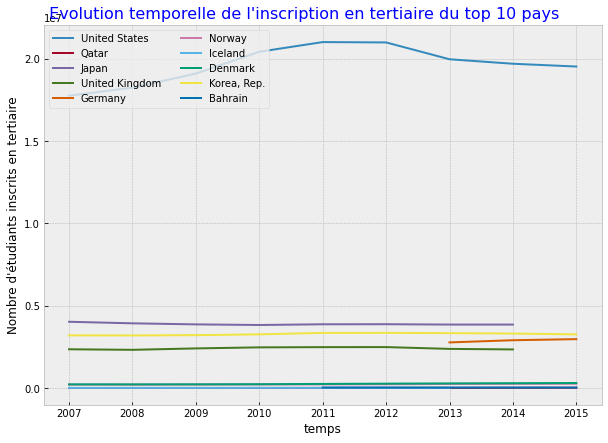

In [86]:
plt.style.use('bmh')

evolutionTertiary3.plot(x = 'x', y = MyY.index, figsize = (10,7))
plt.title(" Evolution temporelle de l'inscription en tertiaire du top 10 pays", loc='left', fontsize=16, fontweight=0, color='blue')

plt.legend(loc=2, ncol=2)
plt.xlabel("temps")
plt.ylabel("Nombre d'étudiants inscrits en tertiaire")

plt.show()

In [56]:
#préparation des tableaux pour l'étude de l'évolution temporelle de l'indicateur 'Enrolment in secondary education, both sexes (number)'

Tableau_evolutionS=(Tableau_evolution2[Tableau_evolution2['Indicator Name'].isin(['Enrolment in secondary education, both sexes (number)'])])
evolutionSecondary=Tableau_evolutionS[['Country Name','2007','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']]

evolutionSecondary2=evolutionSecondary.set_index("Country Name")
evolutionSecondary2.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,
Australia,2189319.0,2222159.0,2255457.0,2282421.0,2328350.0,2377328.0,2384025.000,2.371284e+06,NaN,NaN
Austria,777792.0,770792.0,762981.0,743709.0,723523.0,709910.0,706501.625,6.973884e+05,691071.25,NaN
Bahrain,NaN,77928.0,79162.0,79919.0,81857.0,83141.0,88866.000,9.009200e+04,92454.00,NaN
Belgium,825293.0,817258.0,810411.0,805880.0,802659.0,793767.0,1206574.000,1.210112e+06,1217912.00,NaN
Cyprus,64853.0,64966.0,64557.0,63662.0,62894.0,61801.0,60793.000,5.863400e+04,57161.00,NaN


In [57]:
#Evolution temporelle de l'indicateur "Enrolment in secondary education, both sexes (number)"
evolutionSecondary3=pd.DataFrame({'x': ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'], 'United States': evolutionSecondary2.iloc[-1,:], 'Qatar': evolutionSecondary2.iloc[-9,:], 'Japan': evolutionSecondary2.iloc[14,:], 'United Kingdom': evolutionSecondary2.iloc[-2,:],'Germany': evolutionSecondary2.iloc[9,:], 'Norway': evolutionSecondary2.iloc[20,:], 'Iceland': evolutionSecondary2.iloc[11,:], 'Denmark': evolutionSecondary2.iloc[6,:],'Korea, Rep.': evolutionSecondary2.iloc[15,:], 'Bahrain': evolutionSecondary2.iloc[2,:] })
evolutionSecondary3

,x,United States,Qatar,Japan,United Kingdom,Germany,Norway,Iceland,Denmark,"Korea, Rep.",Bahrain
2007,2007,24731028.0,61110.0,7427059.0,5306369.0,7981848.0,419698.0,34434.0,475140.0,3928039.0,NaN
2008,2008,24692888.0,66084.0,7355678.0,5356450.0,7907105.0,423598.0,35075.0,484199.0,3958781.0,77928.0
2009,2009,24524564.0,66584.0,7299966.0,5429636.0,7740935.0,425141.0,35075.0,493144.0,3994713.0,79162.0
2010,2010,24192786.0,68924.0,7296330.0,5538230.0,7663755.0,435085.0,35623.0,504205.0,3959451.0,79919.0
2011,2011,24214304.0,72754.0,7284867.0,5000332.0,7528270.0,437010.0,35217.0,519115.0,3877799.0,81857.0
2012,2012,24122436.0,76841.0,7288434.0,4849275.0,7392963.0,432546.0,36127.0,527851.0,3793127.0,83141.0
2013,2013,24095460.0,79006.0,7280759.0,6496973.0,7289386.5,442563.0,38238.0,555278.0,3720130.0,88866.0
2014,2014,24229776.0,88466.0,7227485.0,6556991.5,7201072.0,439250.0,NaN,553791.0,3579411.0,90092.0
2015,2015,NaN,95567.0,NaN,NaN,7112949.5,437074.0,NaN,553263.0,3396766.0,92454.0
2016,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#Description statistique de l'indicateurs "Enrolment in tertiary education" sur les 10 années retenues pour chacun des top 10 pays
(evolutionSecondary3[['United States', 'Qatar', 'Japan', 'United Kingdom', 'Germany','Norway', 'Iceland', 'Denmark', 'Korea, Rep.', 'Bahrain']]).describe(include="all")

,United States,Qatar,Japan,United Kingdom,Germany,Norway,Iceland,Denmark,"Korea, Rep.",Bahrain
count,8.000000e+00,9.000000,8.000000e+00,8.000000e+00,9.000000e+00,9.000000,7.000000,9.000000,9.000000e+00,8.000000
mean,2.435041e+07,75037.333333,7.307572e+06,5.566782e+06,7.535365e+06,432440.555556,35684.142857,518442.888889,3.800913e+06,84177.375000
std,2.583976e+05,11230.415854,5.951015e+04,6.339368e+05,3.096977e+05,7842.450767,1241.318980,31221.495334,2.026919e+05,5532.619631
min,2.409546e+07,61110.000000,7.227485e+06,4.849275e+06,7.112950e+06,419698.000000,34434.000000,475140.000000,3.396766e+06,77928.000000
25%,2.417520e+07,66584.000000,7.283840e+06,5.229860e+06,7.289386e+06,425141.000000,35075.000000,493144.000000,3.720130e+06,79729.750000
50%,2.422204e+07,72754.000000,7.292382e+06,5.393043e+06,7.528270e+06,435085.000000,35217.000000,519115.000000,3.877799e+06,82499.000000
75%,2.456664e+07,79006.000000,7.313894e+06,5.777916e+06,7.740935e+06,437074.000000,35875.000000,553263.000000,3.958781e+06,89172.500000
max,2.473103e+07,95567.000000,7.427059e+06,6.556992e+06,7.981848e+06,442563.000000,38238.000000,555278.000000,3.994713e+06,92454.000000


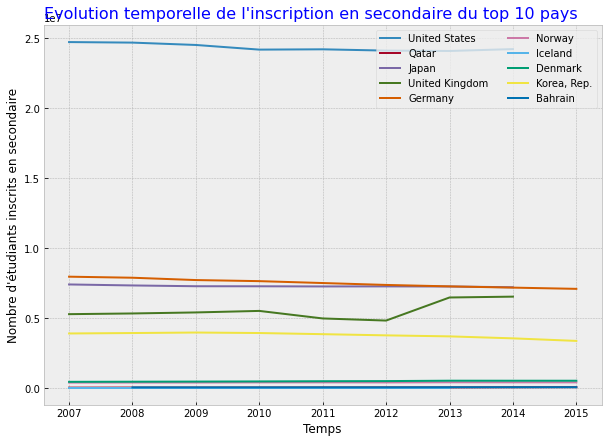

In [87]:
plt.style.use('bmh')

evolutionSecondary3.plot(x = 'x', y = MyY.index, figsize = (10,7))
plt.title("Evolution temporelle de l'inscription en secondaire du top 10 pays", loc='left', fontsize=16, fontweight=0, color='blue')

plt.legend(loc=1, ncol=2)
plt.xlabel("Temps")
plt.ylabel("Nombre d'étudiants inscrits en secondaire")

plt.show()

In [60]:
#Estimation d'évolution d'indicateurs

In [61]:
Tableau_evolution3=Tableau_evolution2.copy()

In [62]:
TableauTauxVariation=Tableau_evolution3.copy()
a=(TableauTauxVariation[['2007','2008','2009','2010','2011']]).mean(axis=1)
b=(TableauTauxVariation[['2012','2013','2014','2015','2016']]).mean(axis=1)
TableauTauxVariation["Taux de variation%"]=((b-a)/a)*100
TableauTauxVariation

,Country Name,Indicator Name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Taux de variation%
129466,Australia,"Enrolment in secondary education, both sexes (...",2189319.00,2222159.00,2255457.00,2282421.00,2.328350e+06,2.377328e+06,2.384025e+06,2.371284e+06,NaN,NaN,5.409099
129479,Australia,"Enrolment in tertiary education, all programme...",1083715.00,1117804.00,1199845.00,1276488.00,1.324257e+06,1.364203e+06,1.390478e+06,1.453521e+06,NaN,NaN,16.853426
129527,Australia,"GNI per capita, PPP (current international $)",34960.00,35980.00,38880.00,37670.00,4.010000e+04,4.132000e+04,4.453000e+04,4.522000e+04,4.551000e+04,45970.000000,18.636388
129650,Australia,Internet users (per 100 people),69.45,71.67,74.25,76.00,7.948770e+01,7.900000e+01,8.345350e+01,8.400000e+01,8.456052e+01,88.238658,13.049473
133131,Austria,"Enrolment in secondary education, both sexes (...",777792.00,770792.00,762981.00,743709.00,7.235230e+05,7.099100e+05,7.065016e+05,6.973884e+05,6.910712e+05,NaN,-7.216790
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844325,United Kingdom,Internet users (per 100 people),75.09,78.39,83.56,85.00,8.538000e+01,8.748000e+01,8.984410e+01,9.161000e+01,9.200030e+01,94.775801,11.852683
847806,United States,"Enrolment in secondary education, both sexes (...",24731028.00,24692888.00,24524564.00,24192786.00,2.421430e+07,2.412244e+07,2.409546e+07,2.422978e+07,NaN,NaN,-1.315388
847819,United States,"Enrolment in tertiary education, all programme...",17758870.00,18248124.00,19102814.00,20427708.00,2.101613e+07,2.099411e+07,1.997262e+07,1.970022e+07,1.953173e+07,NaN,3.826591
847867,United States,"GNI per capita, PPP (current international $)",48420.00,48640.00,47250.00,48880.00,5.071000e+04,5.285000e+04,5.400000e+04,5.616000e+04,5.790000e+04,58700.000000,14.641246


In [63]:
TableauTauxVariation4= TableauTauxVariation.pivot_table('Taux de variation%', index='Country Name', columns = 'Indicator Name')
TableauTauxVariation4

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people)
Country Name,,,,
Australia,5.409099,16.853426,18.636388,13.049473
Austria,-7.216790,31.431822,16.732858,10.905871
Bahrain,11.191849,-3.792159,6.348309,70.451905
Belgium,36.290900,15.518720,13.533492,17.479231
Cyprus,-7.149723,17.430298,-7.992509,41.340974
Czech Republic,-10.070826,2.242221,17.262090,17.349410
Denmark,10.579426,23.367508,16.361480,9.360613
Finland,18.682981,0.374609,7.209409,4.617451
France,0.584954,6.206919,11.978592,14.851149


In [64]:
TableauTauxVariation4["Taux de variation Moyenne %"]=(TableauTauxVariation4.mean(axis=1))


In [65]:
SortedByTauxVariation=TableauTauxVariation4.sort_values(by = "Taux de variation Moyenne %", ascending = False)
SortedByTauxVariation

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),Taux de variation Moyenne %
Country Name,,,,,
Oman,-6.647949,58.748348,0.973819,125.798651,44.718217
Saudi Arabia,17.109956,71.513568,18.212650,67.574440,43.602654
Qatar,26.648502,72.874879,11.360263,59.055046,42.484673
Bahrain,11.191849,-3.792159,6.348309,70.451905,21.049976
Belgium,36.290900,15.518720,13.533492,17.479231,20.705586
Singapore,NaN,19.840307,24.063990,12.016076,18.640124
Kuwait,9.232275,NaN,-7.104832,49.351195,17.159546
Israel,8.687934,9.215001,23.610315,21.558447,15.767924
Denmark,10.579426,23.367508,16.361480,9.360613,14.917257


Text(0, 0.5, 'Pays')

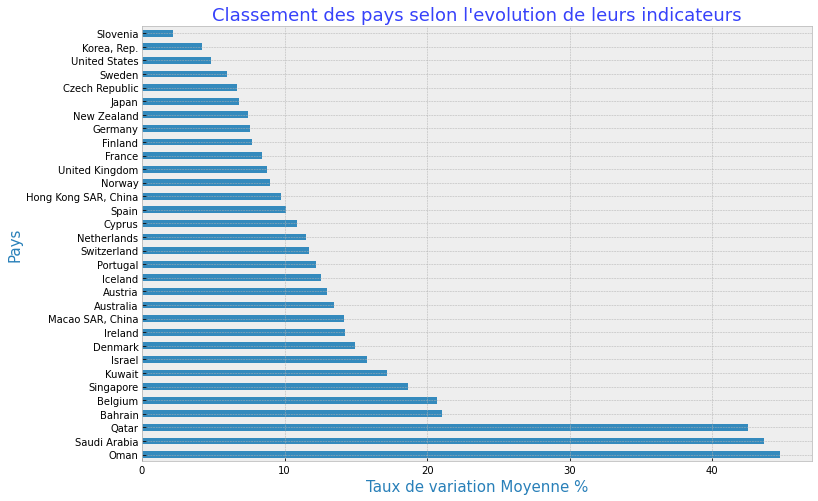

In [66]:
SortedByTauxVariation["Taux de variation Moyenne %"].plot.barh(figsize=(12,8), fontsize=10, rot=0)

plt.title("Classement des pays selon l'evolution de leurs indicateurs", fontsize=18, color='#3742fa')
plt.xlabel("Taux de variation Moyenne %", fontsize=15, color='#2980b9')
plt.ylabel('Pays', fontsize=15, color='#2980b9')